
# CLASSIFICATION OF KYPHOSIS DISEASE

# PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

- Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

<img src="image.png">

## Import Libraries 


In [1]:
%matplotlib inline
import pandas as pd                # Data Manipulation and exploring
import numpy as np                 # Data Statistical Analysis 
import matplotlib.pyplot as plt    # Data Visualization 
import seaborn as sns              # Statistical Data Visualization



In [2]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [3]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
# View statistical details
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
# Print summary of the dataframe. No empty data
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [7]:
kyphosis_df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

## Visualize Dataset

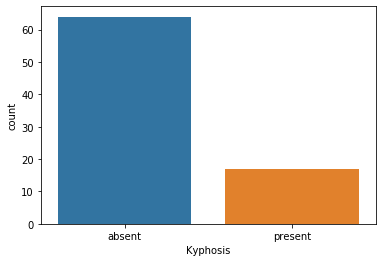

In [8]:
# Count Patients - 64 absent with no kyphosis after operation and 18 preset with the disease after surgery 
sns.countplot(kyphosis_df['Kyphosis'], label = 'Count')

In [9]:
# Perform data preprocessing. Import class
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Instantiate an object out of our class 

LabelEncoder_y = LabelEncoder()

# Replace Kyphosis column ("absent and present") into 0 and 1. Take the object and apply fit transform method to our column
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [10]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [11]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6
80,0,36,4,13


In [12]:
# Absent - no kyphosis after operation
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']== 0]

In [13]:
kyphosis_False.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [14]:
print ('Disease absent after operation percentage = ', (len(kyphosis_False)/len(kyphosis_df)) * 100, '%') 

Disease absent after operation percentage =  79.01234567901234 %


In [15]:
# Disease kyphosis Present after the operation
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']== 1]

In [16]:
kyphosis_True.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [17]:
print ('Disease present after operation percentage = ', (len(kyphosis_True)/len(kyphosis_df)) * 100, '%') 

Disease present after operation percentage =  20.98765432098765 %


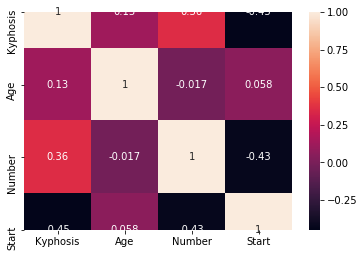

In [18]:
# Correlation 

sns.heatmap(kyphosis_df.corr(), annot = True)

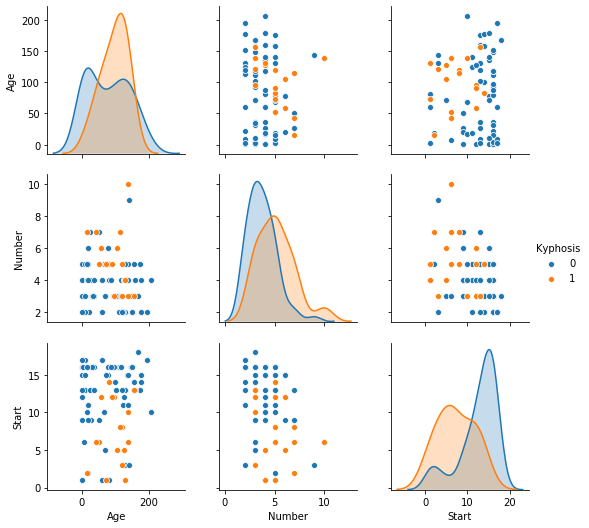

In [19]:
# Visualize 
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

## Testing and Training dataset

In [20]:
# (Kyphosis) target class/output and 3 inputs (Age Number and Start)
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [21]:
# Drop the target label (Kyphosis column)
X = kyphosis_df.drop(['Kyphosis'], axis = 1)

In [22]:
# Inputs to the Machine learning algorithm
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [23]:
# Output target class
y = kyphosis_df['Kyphosis']

In [24]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int32

In [25]:
# Divide data into training and testing sets
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Training Model

In [27]:
# 56 samples/data point for training
X_train.shape

(56, 3)

In [28]:
y_train.shape

(56,)

In [29]:
# 25 samples for testing
X_test.shape

(25, 3)

In [30]:
y_test.shape

(25,)

In [31]:
# Train a decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
decision_tree = DecisionTreeClassifier()    # Instantiate an object out of our class
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Evaluating the model 

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
# Plot the Confusion Matrix for the testing dataset  
y_predict_test = decision_tree.predict(X_test)

In [35]:
y_predict_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1])

In [36]:
y_test

25    0
4     0
64    0
38    0
30    0
49    0
17    0
61    1
35    0
7     0
5     0
41    0
70    0
33    0
42    0
28    0
0     0
36    0
54    0
66    0
15    0
59    0
29    0
2     1
50    0
Name: Kyphosis, dtype: int32

In [37]:
cm = confusion_matrix(y_test, y_predict_test)

In [38]:
cm

array([[21,  2],
       [ 0,  2]], dtype=int64)

In [39]:
 tn, fp, fn, tp=confusion_matrix(y_test, y_predict_test).ravel()

In [40]:
tn, fp, fn, tp

(21, 2, 0, 2)

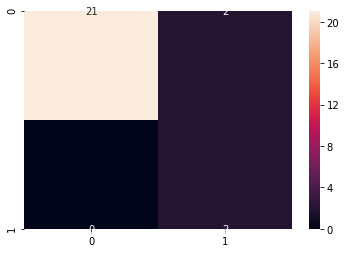

In [41]:
# Misclassified 3 and 4 samples. Correctly classified 18 samples (16 class 0 and 2 class 1)
sns.heatmap(cm, annot = True)

In [42]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.50      1.00      0.67         2

    accuracy                           0.92        25
   macro avg       0.75      0.96      0.81        25
weighted avg       0.96      0.92      0.93        25



https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9






## Training model2

In [43]:
# Random Forest classifier to improve the model
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
#predicting on test data
y_predict_test = RandomForest.predict(X_test)

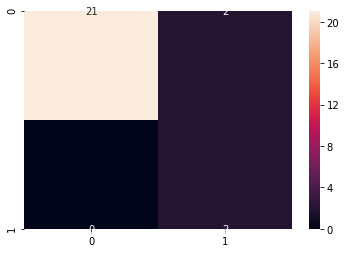

In [45]:
#creating confusion matrix for test prediction
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.50      1.00      0.67         2

    accuracy                           0.92        25
   macro avg       0.75      0.96      0.81        25
weighted avg       0.96      0.92      0.93        25

